**ASSIGNMENT: IMPLEMENTATION OF A THREE HIDDEN LAYER NEURAL NETWORK FOR MULTI-CLASS CLASSIFICATION**

In this assignment, you will implement a three hidden layer neural network for multi-class classification. You will generate a synthetic dataset with five classes to train and test your neural network model. Your task involves modifying the provided codebase (https://github.com/debajyotikarmaker/ML/blob/main/05_neural_network.ipynb ) to accommodate the multi-class classification problem and evaluating the performance of your model.

**Dataset Generation:**

•	Generate a synthetic dataset containing input features and corresponding class labels.

•	Ensure that the dataset has five distinct classes.

•	The input features should be suitable for training a neural network.


**Task:**

•	Implement a neural network with three hidden layers to classify the generated dataset.

•	Modify the provided code to support multi-class classification with five classes.

•	Adjust the network architecture and parameters as necessary for handling the multi-class problem.

**Code Modification:**

•	Extend the NeuralNetwork class provided in the code to support multi-class classification.

•	Update the output layer to have five neurons, each corresponding to one class.

•	Modify the activation function and loss calculation to suit the multi-class scenario.

•	Ensure that the backpropagation algorithm is adapted to handle multiple classes.


**Training and Testing:**

•	Split the generated dataset into training and testing sets.

•	Train the neural network using the training data.

•	Evaluate the performance of the trained model using the testing data.

•	Calculate relevant evaluation metrics such as accuracy, precision, recall, and F1-score for each class and overall.
Documentation:

•	Provide a detailed explanation of the modifications made to the code to implement multi-class classification.

•	Include comments within the code to describe the purpose of each section and any relevant mathematical formulas.

•	Document any challenges faced during implementation and how they were addressed.


**Results and Analysis:**

•	Present the results of training and testing, including performance metrics and any relevant visualizations (e.g., confusion matrix, ROC curves).

•	Analyze the performance of the neural network and discuss any observations or insights gained from the experiment.

•	Compare the performance of your model with different configurations and hyperparameters.
Conclusion:

•	Summarize the key findings of the assignment, highlighting the performance of your multi-class classification model.

•	Reflect on the challenges encountered and lessons learned during the implementation.

•	Discuss potential improvements or further experiments that could enhance the performance of the neural network for multi-class classification tasks.


**Note:**

•	You have the flexibility to experiment with different dataset sizes, network architectures, activation functions, and optimization techniques to improve the model's performance.

•	Avoid plagiarism or copying of code from external sources. Originality and understanding of the implemented algorithms will be evaluated.

**Submission:**

•	Submit your code as python script/s and provide instructions in the script to execute your code. If instructions to execute your code is not clear, I may not be able to execute it, leading to loss of points.

•	Provide your results and analysis for the assignment in a report in pdf or word doc format.

•	Upload your code and report, as well as any relevant documents/scripts in a zipped folder to the submission link.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import random
from IPython import display
from sklearn.metrics import confusion_matrix


random.seed(0)
np.random.seed(0)

<ipython-input-2-28849c22f17b>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter_plot = plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y, cmap=plt.cm.get_cmap('viridis', num_classes), marker='o', s=20)


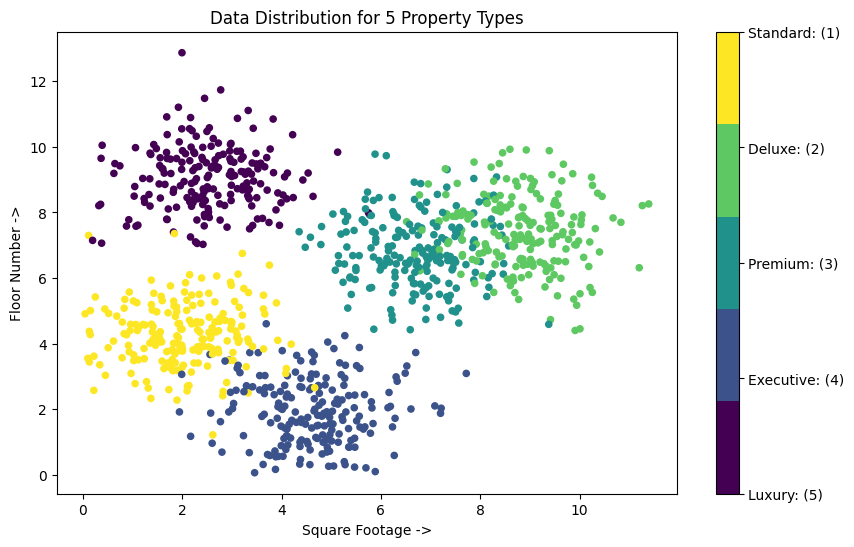

In [ ]:
num_samples = 1000
num_features = 2
num_classes = 5
random_state = 42

data_X, data_y = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_classes, random_state=random_state)
data_X = abs(data_X)
data_y = abs(data_y)

train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=random_state)

class_labels = ['Standard: (1)', 'Deluxe: (2)', 'Premium: (3)', 'Executive: (4)', 'Luxury: (5)']
plt.figure(figsize=(10,6))
scatter_plot = plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y, cmap=plt.cm.get_cmap('viridis', num_classes), marker='o', s=20)
color_bar = plt.colorbar(scatter_plot, ticks=range(num_classes))
color_bar.set_ticklabels(class_labels[::-1])

plt.title('Data Distribution for 5 Property Types')
plt.xlabel('Square Footage ->')
plt.ylabel('Floor Number ->')

plt.show()

In [ ]:
train_X

array([[10.00844078,  5.52154248],
       [ 8.82797514,  6.01168668],
       [ 6.67124438,  8.92184446],
       ...,
       [ 0.44110953,  5.05648987],
       [ 1.68378127,  9.82779576],
       [ 4.37099015,  0.86664378]])

In [ ]:
train_y

array([3, 3, 2, 1, 4, 3, 1, 3, 1, 4, 1, 0, 4, 0, 4, 3, 1, 4, 1, 1, 3, 2,
       3, 2, 3, 2, 3, 2, 4, 1, 4, 1, 3, 4, 3, 3, 1, 0, 1, 0, 1, 3, 3, 0,
       3, 0, 3, 1, 3, 1, 2, 0, 3, 2, 4, 4, 0, 2, 1, 2, 1, 0, 0, 3, 1, 4,
       0, 0, 1, 4, 1, 0, 4, 2, 1, 4, 4, 1, 1, 1, 1, 0, 1, 4, 3, 4, 1, 0,
       4, 2, 3, 3, 4, 1, 1, 0, 0, 0, 4, 1, 3, 3, 2, 4, 0, 2, 1, 1, 3, 4,
       3, 2, 0, 4, 2, 4, 1, 0, 4, 3, 3, 1, 0, 2, 4, 3, 4, 0, 2, 4, 4, 2,
       0, 4, 1, 2, 3, 1, 4, 0, 1, 0, 0, 2, 2, 3, 4, 4, 1, 4, 0, 0, 3, 1,
       0, 3, 3, 0, 4, 1, 1, 1, 4, 1, 3, 4, 3, 4, 2, 3, 1, 3, 2, 2, 3, 3,
       1, 2, 0, 0, 3, 1, 2, 1, 2, 3, 0, 1, 0, 2, 4, 3, 0, 4, 3, 0, 3, 2,
       3, 3, 0, 1, 2, 0, 4, 0, 3, 3, 3, 1, 3, 0, 3, 1, 1, 3, 1, 0, 4, 4,
       0, 0, 1, 1, 3, 1, 2, 3, 0, 3, 3, 4, 0, 2, 3, 3, 1, 3, 0, 3, 2, 2,
       4, 2, 0, 3, 3, 3, 4, 2, 0, 1, 3, 0, 3, 4, 4, 1, 1, 0, 3, 2, 0, 1,
       0, 0, 3, 2, 1, 4, 2, 1, 2, 3, 3, 4, 3, 1, 0, 4, 1, 4, 2, 3, 1, 2,
       3, 0, 3, 3, 2, 4, 3, 2, 0, 1, 0, 4, 4, 0, 3,

In [ ]:
test_X

array([[ 3.26833028,  9.16467991],
       [ 3.94015333,  2.18714959],
       [ 3.66400558,  3.02681148],
       [ 7.51858894,  8.20319939],
       [ 2.06537819,  9.78892018],
       [ 8.71565744,  8.94820137],
       [ 0.15036931,  5.00887323],
       [ 5.84109276,  1.56509431],
       [ 6.22108292,  4.86990505],
       [ 5.03433098,  1.5521852 ],
       [ 2.53009922,  9.13161351],
       [ 8.29957176,  6.40284932],
       [ 4.29719124,  1.60172882],
       [ 5.6901567 ,  8.10771741],
       [ 4.58072907,  7.24294815],
       [ 1.78336814,  3.79462714],
       [ 1.24942257,  4.56850384],
       [ 2.58629933,  9.3554381 ],
       [ 6.82494051,  7.46005825],
       [ 7.88376796,  7.64790716],
       [ 4.73921114,  2.72455681],
       [ 1.48633679,  4.96950935],
       [10.31723933,  7.50688284],
       [ 5.01102471,  1.3691845 ],
       [ 2.95571258,  9.87068492],
       [ 9.06481186,  6.36408368],
       [ 1.0949471 ,  4.39982054],
       [ 4.18051794,  1.12332531],
       [ 5.47380099,

In [ ]:
test_y

array([0, 1, 1, 2, 0, 3, 4, 1, 2, 1, 0, 3, 1, 2, 2, 4, 4, 0, 3, 2, 1, 4,
       3, 1, 0, 3, 4, 1, 1, 2, 2, 3, 4, 3, 2, 0, 1, 4, 1, 0, 3, 0, 4, 1,
       4, 0, 4, 2, 2, 2, 1, 2, 4, 4, 2, 1, 4, 4, 2, 0, 4, 0, 3, 1, 2, 4,
       2, 1, 3, 4, 2, 3, 2, 2, 3, 0, 2, 0, 2, 0, 2, 3, 4, 3, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 3, 3, 3, 3, 0, 4, 2, 4, 3, 0, 3, 0, 0, 0, 3, 0, 2,
       2, 3, 1, 4, 0, 4, 4, 2, 1, 1, 3, 1, 4, 1, 0, 4, 4, 2, 3, 4, 2, 4,
       3, 0, 2, 0, 2, 2, 1, 1, 3, 2, 2, 2, 3, 1, 4, 2, 0, 0, 2, 3, 0, 4,
       2, 3, 3, 2, 1, 0, 0, 3, 2, 4, 4, 0, 0, 1, 4, 3, 1, 4, 0, 0, 3, 4,
       4, 0, 4, 4, 1, 3, 2, 2, 2, 4, 0, 2, 0, 3, 2, 3, 2, 1, 4, 1, 0, 4,
       4, 1])

In [ ]:
print("Shapes of Training Data:")
print("Features (Training):", train_X.shape)
print("Labels (Training):", train_y.shape)
print("\nShapes of Test Data:")
print("Features (Test):", test_X.shape)
print("Labels (Test):", test_y.shape)

Shapes of Training Data:
Features (Training): (800, 2)
Labels (Training): (800,)

Shapes of Test Data:
Features (Test): (200, 2)
Labels (Test): (200,)


In [ ]:
class NeuralNetwork(object):
    def __init__(self) :
        input_layer_neurons = 2
        hidden_layer_neurons_1 = 800
        hidden_layer_neurons_2 = 400
        hidden_layer_neurons_3 = 700
        output_layer_neurons = num_classes
        self.learning_rate = 0.1

        self.weights_hidden_layer_1 = np.random.randn(input_layer_neurons, hidden_layer_neurons_1)
        self.weights_hidden_layer_2 = np.random.randn(hidden_layer_neurons_1, hidden_layer_neurons_2)
        self.weights_hidden_layer_3 = np.random.randn(hidden_layer_neurons_2, hidden_layer_neurons_3)
        self.weights_output_layer = np.random.randn(hidden_layer_neurons_3, output_layer_neurons)

        self.bias_hidden_layer_1 = np.zeros((1, hidden_layer_neurons_1))
        self.bias_hidden_layer_2 = np.zeros((1, hidden_layer_neurons_2))
        self.bias_hidden_layer_3 = np.zeros((1, hidden_layer_neurons_3))
        self.bias_output_layer = np.zeros((1, output_layer_neurons))


    def forward_propagation(self, x):
        self.hidden_output_1 = self.sigmoid(np.dot(x, self.weights_hidden_layer_1) + self.bias_hidden_layer_1)
        self.hidden_output_2 = self.sigmoid(np.dot(self.hidden_output_1, self.weights_hidden_layer_2) + self.bias_hidden_layer_2)
        self.hidden_output_3 = self.sigmoid(np.dot(self.hidden_output_2, self.weights_hidden_layer_3) + self.bias_hidden_layer_3)
        self.output = self.softmax(np.dot(self.hidden_output_3, self.weights_output_layer) + self.bias_output_layer)

        return self.output


    def backpropagation(self, x, output_values):
        m = x.shape[0]

        diff_out = self.output - output_values
        d_WO = (1/m) * np.dot(self.hidden_output_3.T, diff_out)
        d_WB = (1/m) * np.sum(diff_out, axis=0, keepdims=True)

        d_hidden3 = np.dot(diff_out, self.weights_output_layer.T) * self.sigmoid_derivative(self.hidden_output_3)
        d_W_HI3 = (1/m) * np.dot(self.hidden_output_2.T, d_hidden3)
        d_b3 = (1/m) * np.sum(d_hidden3, axis=0, keepdims=True)

        d_hidden2 = np.dot(d_hidden3, self.weights_hidden_layer_3.T) * self.sigmoid_derivative(self.hidden_output_2)
        d_W_HI2 = (1/m) * np.dot(self.hidden_output_1.T, d_hidden2)
        d_b2 = (1/m) * np.sum(d_hidden2, axis=0, keepdims=True)

        d_hidden1 = np.dot(d_hidden2, self.weights_hidden_layer_2.T) * self.sigmoid_derivative(self.hidden_output_1)
        d_W_HI1 = (1/m) * np.dot(x.T, d_hidden1)
        d_b1 = (1/m) * np.sum(d_hidden1, axis=0, keepdims=True)

        self.weights_output_layer -= self.learning_rate * d_WO
        self.bias_output_layer -= self.learning_rate * d_WB
        self.weights_hidden_layer_3 -= self.learning_rate * d_W_HI3
        self.bias_hidden_layer_3 -= self.learning_rate * d_b3
        self.weights_hidden_layer_2 -= self.learning_rate * d_W_HI2
        self.bias_hidden_layer_2 -= self.learning_rate * d_b2
        self.weights_hidden_layer_1 -= self.learning_rate * d_W_HI1
        self.bias_hidden_layer_1 -= self.learning_rate * d_b1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def predict(self, x):
        probabilities = self.forward_propagation(x)
        return np.argmax(probabilities, axis=1)

    def relu(x, ok=False):
        if ok == True:
            return np.maximum(0, x)
        else:
            return np.where(x <= 0, 0, 1)



In [ ]:
NN = NeuralNetwork()

In [ ]:
def one_hot_encode_labels(labels, num_classes):
    return np.eye(num_classes)[labels]

y_train_one_hot = one_hot_encode_labels(train_y, num_classes)


Cycle 0, Error: 28.443605928247706
Cycle 100, Error: 0.5814406882965799
Cycle 200, Error: 0.6072552542263955
Cycle 300, Error: 0.546845527989218
Cycle 400, Error: 0.5121654660897187
Cycle 500, Error: 0.4966928710512434
Cycle 600, Error: 0.43766111352789144
Cycle 700, Error: 0.5694400771892778
Cycle 800, Error: 0.4299647896561267
Cycle 900, Error: 0.509598967287018
Cycle 1000, Error: 0.5131870128442033
Cycle 1100, Error: 0.4981484334043623
Cycle 1200, Error: 0.4781942359260942
Cycle 1300, Error: 0.45134034093895614
Cycle 1400, Error: 0.41211950360884414
Cycle 1500, Error: 0.38491732995919536
Cycle 1600, Error: 0.3642635976483776
Cycle 1700, Error: 0.3491811847830857
Cycle 1800, Error: 0.327156313542342
Cycle 1900, Error: 0.3168081650987802
Cycle 2000, Error: 0.30496510249005676
Cycle 2100, Error: 0.29828348393680437
Cycle 2200, Error: 0.2946888096391691
Cycle 2300, Error: 0.2885353765218737
Cycle 2400, Error: 0.2828215927688306
Cycle 2500, Error: 0.2783034171207537
Cycle 2600, Error: 0.

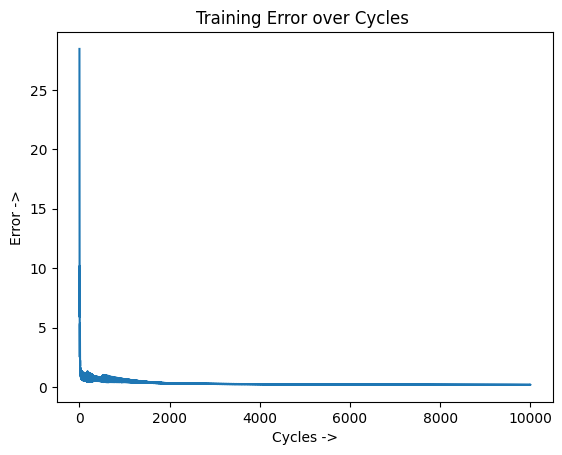

In [ ]:
error_list = []

epochs = 10000

for i in range(epochs):
    output = NN.forward_propagation(train_X)
    NN.backpropagation(train_X, y_train_one_hot)

    loss = np.mean(-np.sum(y_train_one_hot * np.log(output), axis=1))
    error_list.append(loss)

    if i % 100 == 0:
        print(f'Cycle {i}, Error: {loss}')

plt.plot(error_list)
plt.xlabel('Cycles ->')
plt.ylabel('Error ->')
plt.title('Training Error over Cycles ')
plt.show()


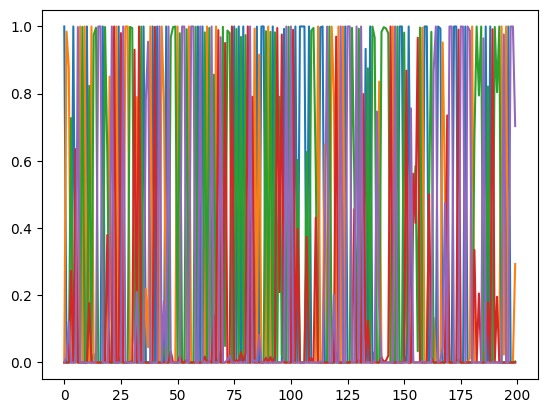

In [ ]:
y_predictions = NN.forward_propagation(test_X)
plt.plot(range(len(y_predictions)), y_predictions)

In [ ]:
area1 = 20
floor1 = 30
test1 = NN.predict([[area1, floor1]])

predicted_class = test1[0]

print("Possibilities classes:\n")
for i, name in enumerate(class_labels):
    print(f"Class {i+1} ({name}): {predicted_class:.4f}")

predicted_class_index = np.argmax(predicted_class)
print("\nClass of prediction:")
print(f"{class_labels[predicted_class_index]} ({predicted_class:.4f})")

Possibilities classes:

Class 1 (Standard: (1)): 2.0000
Class 2 (Deluxe: (2)): 2.0000
Class 3 (Premium: (3)): 2.0000
Class 4 (Executive: (4)): 2.0000
Class 5 (Luxury: (5)): 2.0000

Class of prediction:
Standard: (1) (2.0000)


In [ ]:
area2 = 90
floor2 = 60
test2 = NN.forward_propagation([[area2, floor2]])

predicted_class = np.argmax(test2)

print("Possibilities classes:\n")
for i, name in enumerate(class_labels):
    print(f"Class {i+1} ({name}): {predicted_class:.4f}")

print("\nClass of prediction:")
print(f"{class_labels[predicted_class]} ({predicted_class:.4f})")


Possibilities classes:

Class 1 (Standard: (1)): 3.0000
Class 2 (Deluxe: (2)): 3.0000
Class 3 (Premium: (3)): 3.0000
Class 4 (Executive: (4)): 3.0000
Class 5 (Luxury: (5)): 3.0000

Class of prediction:
Executive: (4) (3.0000)


In [ ]:
yPredictionClass = np.argmax(y_predictions, axis=1)

validity = accuracy_score(test_y, yPredictionClass)
print("Model Validity :", validity*100,'%')

Model Validity : 88.5 %


In [ ]:
clearness = precision_score(test_y, yPredictionClass, average='weighted')

In [ ]:
avoidance = recall_score(test_y, yPredictionClass, average='weighted')

In [ ]:
f1 = f1_score(test_y, yPredictionClass, average='weighted')

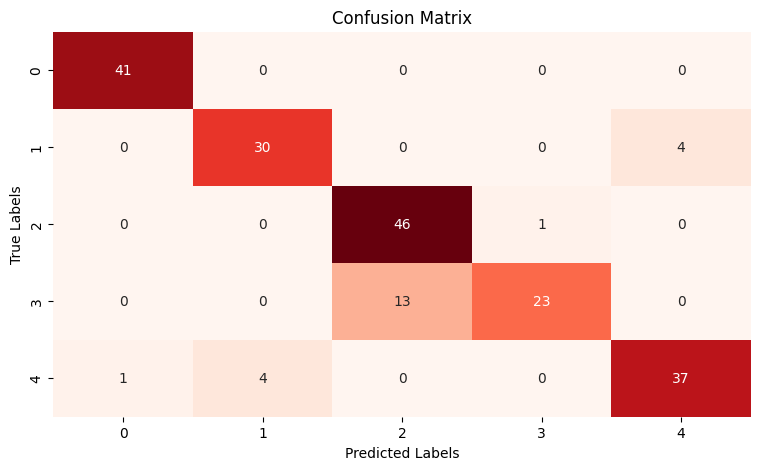

In [ ]:
conf_matrix = confusion_matrix(test_y, yPredictionClass)

plt.figure(figsize=(9, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
print('Arrangement Report:')
print(classification_report(test_y, yPredictionClass))

Arrangement Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.88      0.88      0.88        34
           2       0.78      0.98      0.87        47
           3       0.96      0.64      0.77        36
           4       0.90      0.88      0.89        42

    accuracy                           0.89       200
   macro avg       0.90      0.88      0.88       200
weighted avg       0.90      0.89      0.88       200

